# Downloading the data
We can download the data set from Kaggle:

In [7]:

#%%bash
#mkdir data
#wget https://www.kaggle.com/c/5407/download-all -nc -P ./data1

In [10]:
##Unzipping the downloaded data
import zipfile as zf
files = zf.ZipFile("./data/house-prices-advanced-regression-techniques.zip", 'r')
files.extractall()
files.close()

In [2]:
import pandas as pd
import numpy as np

In [366]:
data = pd.read_csv('./data/train.csv')

In [259]:
df_test = pd.read_csv('./data/test.csv')

In [18]:
metadata = pd.read_csv('./data/data_description.txt',sep='delimiter', header=None,engine='python');

# Exploring all about the data

In [74]:
data.shape

(1460, 81)

In [21]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [110]:
f= data.groupby(data.dtypes)
f.columns

AttributeError: Cannot access attribute 'columns' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [129]:
data.info(verbose=False)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(43)
memory usage: 924.0+ KB


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [123]:
(data["SalePrice"]).head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [28]:
data.isnull().sum()*100/1460

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
                   ...    
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
Fireplaces        0.000000
F

Overall picture of the data shows that some of the columns like Alley, PollQC, Fence and MiscFeature have more than 80%  missing values.
It would be better to drop these columns from the beginning itself as they won't help much in predictions.
Feature FireplaceQu has also ~about 50% data missing. But for time being we will keep this as it represents Fireplace quality which is an imortant factor for a house in cold region.

In [31]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The column to be predicted is the 'SalePrice' column which is one of the 38 columns in the data.We will see the satistical characteristics of this column first

In [35]:
(data["SalePrice"]).describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Let us see the distribution of the values in this column

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

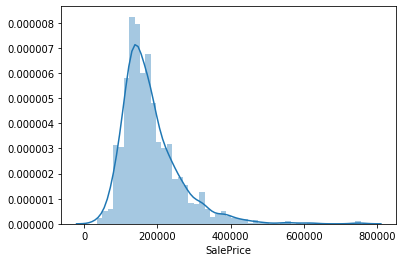

In [48]:
sns.distplot(data['SalePrice'],kde=True, norm_hist=True)

Here the histogram of the 'Saleprice' is displayed with the estimated PDF plot over the data. From the distribution display 
it is quite obvious that the values are not normally distributed and has longer tail to the right. To get a more insight to this 
the distribution let us see the statistical values like skewness and Kurtosis that describes quantitively how much is the 
deviation from the normal distribution. 

Skewness gives the measure of symmetry(how much it is skewed to one side) of the distribution.  Kurtosis gives the measure of 
size of the tails of the distribution. For normal distribution Kurtosis=3, Heavy tailed distribution means more outliers.


In [62]:

print ("Skewness of SalePrice: %f" % data['SalePrice'].skew())
print ("Kurtosis of SalePrice: %f" % data['SalePrice'].kurtosis())

Skewness of SalePrice: 1.882876
Kurtosis of SalePrice: 6.536282


Let us see how the features are correlated with the Saleprice so that we get an understanding of which features are more important in predicting the Saleprice.
Correlation values among features are also imortant in order to identify redundant features

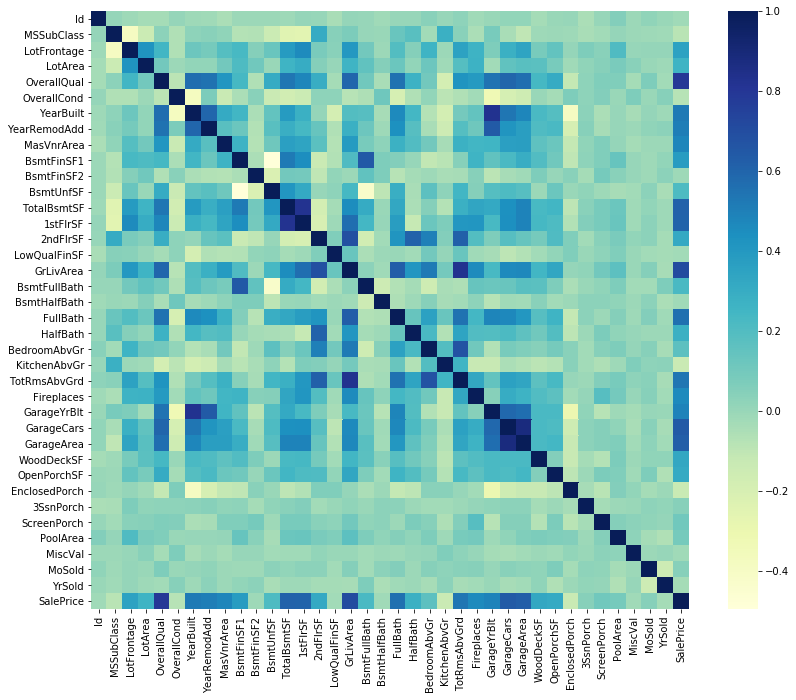

In [104]:
corr_matrix = data.corr()

f, ax = plt.subplots(figsize = (14, 11))
sns.heatmap(corr_matrix, vmax = 1,square = True,cmap="YlGnBu")

## Looking into the kind of relation the features(affecting SalePrice the most) have with the SalePrice  

In [214]:
## Listing the features based on correlation with Saleprice (values in decreasing order)
imp_feature = ((corr_matrix['SalePrice']).sort_values(ascending=False)).head(15)

In [215]:
s = imp_feature.to_dict()
imp_cols= list(s.keys())
imp_cols

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1']

Correlation matrix of important features

In [216]:
(data[imp_cols]).corr()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,0.507101,0.486362,0.477493,0.466929,0.386420
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684,0.547766,0.411876,0.396765,0.239666
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389,0.231197,0.390857,0.461679,0.208171
GarageCars,0.640409,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622,0.588920,0.364204,0.300789,0.224054
GarageArea,0.623431,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600,0.564567,0.373066,0.269141,0.296970
TotalBsmtSF,0.613581,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066,0.322445,0.363936,0.339519,0.522396
1stFlrSF,0.605852,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379,0.233449,0.344501,0.410531,0.445863
FullBath,0.560664,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046,0.484557,0.276833,0.243671,0.058543
TotRmsAbvGrd,0.533723,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740,0.148112,0.280682,0.326114,0.044316
YearBuilt,0.522897,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855,0.825667,0.315707,0.147716,0.249503


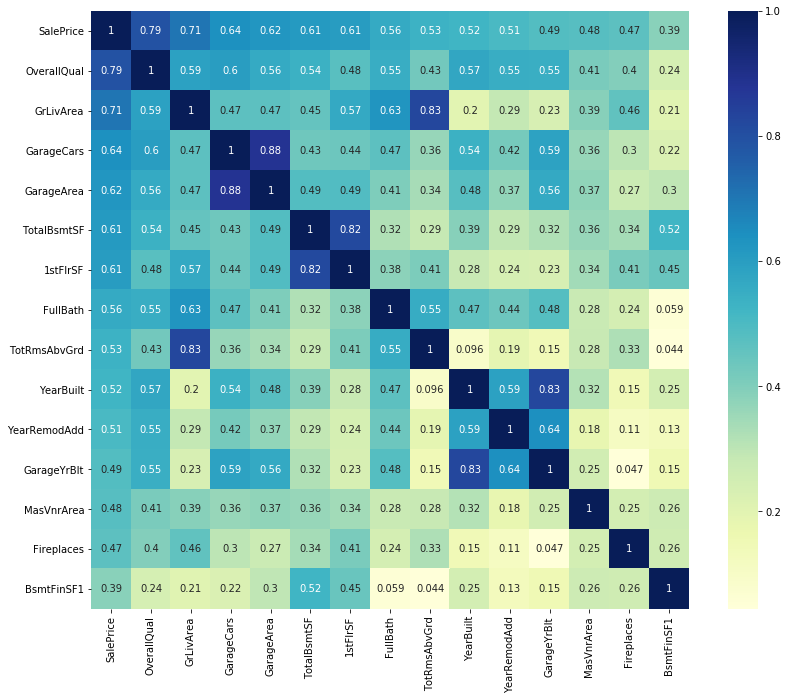

In [217]:
f, ax = plt.subplots(figsize = (14, 11))
sns.heatmap((data[imp_cols]).corr(), annot =True, vmax = 1,square = True,cmap="YlGnBu")

Let us now see how these features are related to SalePrice

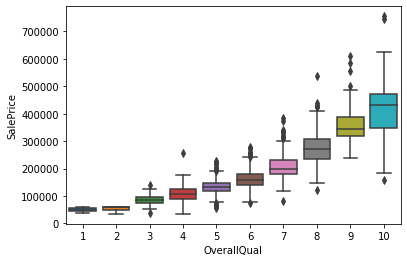

In [218]:
# Box plot overallqual/salePrice
sns.boxplot(x='OverallQual', y='SalePrice', data=data[['SalePrice', 'OverallQual']])

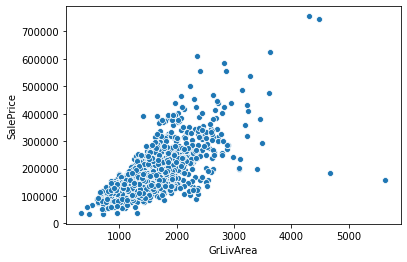

In [219]:
# Scatterplot GrLivArea/salePrice (Above ground Living Area in sq-ft)
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data[['SalePrice', 'GrLivArea']])

There are a couple of outliers in this category though.Specially two houses with really big living areas and low SalePrices 
seem outliers.

We observe that some features are highly correlated(e.g., [GarageCars and GarageArea], and [TotalBsmtSF and 1stFlrSF] [YearBuilt and GarageYrBuilt])
These being redundant, we can forego one of them from each correlated pair. 
But before that let us explore little more as to whch one is wise to forego or may be through Feature Engineering we comeout with a new feature combining info from both the features.

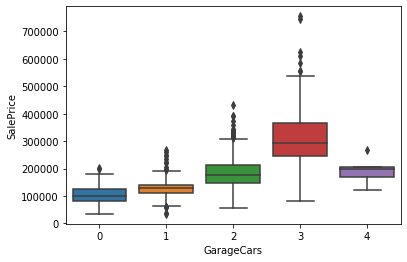

In [220]:
# Box plot GarageCars/salePrice(Size of Garage in Car capacity)
sns.boxplot(x='GarageCars', y='SalePrice', data=data[['SalePrice', 'GarageCars']])

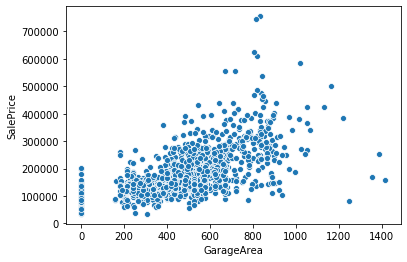

In [221]:
# Scatter plot GarageArea/salePrice(Area of Garage in sq-ft)
sns.scatterplot(x='GarageArea', y='SalePrice', data=data[['SalePrice', 'GarageArea']])

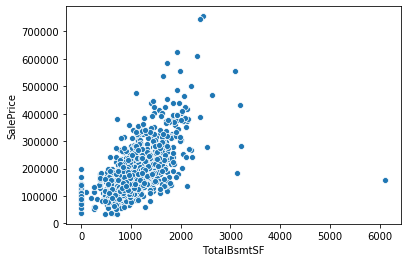

In [222]:
# Scatter plot TotalBsmtSF/salePrice(Total square feet of basement area)
sns.scatterplot(x= 'TotalBsmtSF', y='SalePrice', data= data[['SalePrice', 'TotalBsmtSF']])

In [223]:
##relation ship of remaining columns with Sale Price
rem_cols = ['SalePrice','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt']

C:\Users\rinkideo\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


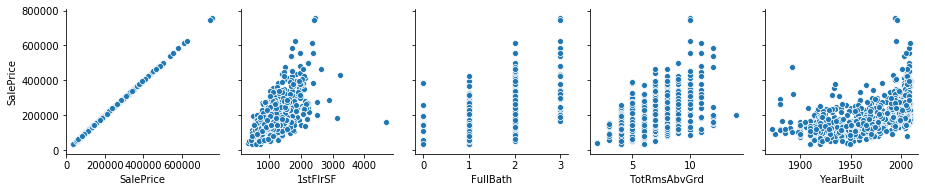

In [224]:
sns.pairplot(data[rem_cols], x_vars = rem_cols, y_vars = 'SalePrice', size = 2.5)

In [225]:
(data[imp_cols]).isnull().sum()

SalePrice        0
OverallQual      0
GrLivArea        0
GarageCars       0
GarageArea       0
TotalBsmtSF      0
1stFlrSF         0
FullBath         0
TotRmsAbvGrd     0
YearBuilt        0
YearRemodAdd     0
GarageYrBlt     81
MasVnrArea       8
Fireplaces       0
BsmtFinSF1       0
dtype: int64

# Dealing with Missing Data
    

Let us once again see the data to select the features to be dropped based on very high count of missing values

In [369]:
df = data

In [387]:
##List of Columns with percentage of missing values. 

df1_missing_values = df.isnull().sum().sort_values(ascending = False)
df1_percentage_missing_values=df.isnull().sum().sort_values(ascending = False)*100/df.shape[0]
df1_missing = pd.concat([df_missing_values, df_percentage_missing_values], axis = 1, keys = [
    'missing_values', 'percentage_missing_values'])

In [388]:
df_missing.head(5)

,missing_values,percentage_missing_values
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274


In [389]:
drop_indices = df_missing[df_missing['percentage_missing_values']>45].index

In [390]:
drop_indices


Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], dtype='object')

In [391]:
df1 = df.drop(drop_indices, axis = 1)

In [392]:
df1.shape

(1460, 76)

# Dealing with Unnecessary Features

Dropping features based on very low correlation value

In [393]:
## Cross check correlation values of these features with SalePrice
corr_matrix = df1.corr()

In [394]:
corr_matrix['SalePrice'].sort_values(ascending=False);

In [395]:
drop_indices1 = corr_matrix[(corr_matrix['SalePrice']<0.04) & (corr_matrix['SalePrice']>-0.03 )].index

In [396]:
drop_indices1 = drop_indices1[drop_indices1 != 'Id']

In [397]:
drop_indices1

Index(['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'MiscVal', 'YrSold'], dtype='object')

In [398]:
df2 = df1.drop(drop_indices1,axis=1)

In [399]:
df2.shape

(1460, 71)

In [412]:
##List of Columns with percentage of missing values. 

df2_missing_values = df2.isnull().sum().sort_values(ascending = False)
df2_percentage_missing_values=df1.isnull().sum().sort_values(ascending = False)*100/df2.shape[0]
df2_missing = pd.concat([df2_missing_values, df1_percentage_missing_values], axis = 1, keys = [
    'missing_values', 'percentage_missing_values'])

C:\Users\rinkideo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [413]:
df2_missing

,missing_values,percentage_missing_values
1stFlrSF,0.0,0.000000
2ndFlrSF,0.0,0.000000
3SsnPorch,0.0,0.000000
Alley,NaN,93.767123
BedroomAbvGr,0.0,0.000000
BldgType,0.0,0.000000
BsmtCond,37.0,2.534247
BsmtExposure,38.0,2.602740
BsmtFinSF1,0.0,0.000000
BsmtFinSF2,NaN,0.000000


In [ ]:
df['GarageArea', 'GarageCars']